# Generation of labeled time-series

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%run plot.py

## Function for the random step
$DX$ is the standard deviation, $bias$ is the constant average of the step

In [2]:
# random seed for reproducibility
np.random.seed(12345)

# function for the random step, using lambda construction
# int() for cleaner look and for mimiking a detector with finite resolution
jump = lambda drift, stdev, dim: np.random.normal(drift,stdev, dim).astype(int)
#steps of the time series
for i in range(10):
    print(jump(5,50,4))

[ -5  28 -20 -22]
[103  74   9  19]
[ 43  67  55 -59]
[18 16 72 49]
[-95 -13  88 -16]
[-21  28 167 -46]
[-23  11  20  31]
[  5  72 -30 -36]
[-113  -88  -38   33]
[-58  10 -48  21]


## Function for the added pattern
Sinusoidal pattern to add to part of a time series, over $z$ bins, with amplitude $a$. The period of the sine function is $z/2$, such that for the considered bins the sine has always the same concavity.

In [3]:
def pattern(i,z,a):
    return a*np.sin((np.pi*i)/z).astype(int)

## Generation of the data

### Data ($x$)
The shape of $x$ is ($N$, $L$). Each line corresponds to one sample of the time series, of length L. 

Every time series starts from the previous one plus a jump:
$$
x[i][0] = x[i-1][-1] + \text{jump}(bias,DX)\quad ,\quad \; i>0
$$
The same is true for the elements of each time series:
$$
x[i][j] = x[i][j-1] + jump(bias,DX)\quad ,\quad \; j>0
$$

In this case, we decided to use:
In our case
- $N=10.000$
- $L=60$
- $bias=5$
- $DX=50$.

### Labels ($y$)
The labels are of 3 types: $0, 1, 2$. For each time series, we select at random $Z$ consecutive samples, with $Z\leq L$. In our case $Z=12$, so only one fifth of the original series if modified by the additional pattern. If $y=1$ we add to the selected portion a concave pattern, if $y=2$ a convex one and, finally, if $y=0$ the series is not modified. 

The labels can be created in 2 ways:
1. Taking the module of $i$ divided by $3$  
2. Selecting a random integer in the range $[0, 2]$


In [4]:
# random seed for reproducibility
np.random.seed(12345)

# pattern parameters: Z=nr of steps, A=amplitude
Z=12
A_list=np.array([200, 400, 500 , 600, 700])
num_As = len(A_list)

# number of data samples
N=10000
# size of each sample of the timeseries
L=60

# jump parameters: introduce small positive bias 
DX = 50  # std
bias = 5 # average step

# initialize x and y
# y = [0] * N 
# x = [[0] * L for i in range(N)]
y = np.zeros((N, num_As))
x = np.zeros((N, L, num_As))
for i in range(N):
    if i>0:
        x[i][0][:] = x[i-1][-1][:] + jump(bias,DX,num_As)#Every time series starts from 
                                            #the previous + a jump 

    for j in range(1,L):
        x[i][j][:] = x[i][j-1][:] + jump(bias,DX,num_As)
        
    y[i][:] = i%3*np.ones(num_As) #for the labels
    ##y[i] = random.randint(0,2)
    if y[i][1]>0:
        j0 = np.random.randint(0,L-1-Z)
        ###print(i,j0,j1)
        sign = 3-2*y[i]
        for j in range(Z):
            x[i][j0+j][:] += sign*pattern(j,Z,A_list)


In [5]:
x.shape, y.shape

((10000, 60, 5), (10000, 5))

First 3 time series: 

[   0.   -5.   69.  124.  173.  152.  163.  133.  166.   54.   73.   81.
   41.   89.   47.  -14.  -34.  -27.   69.   83.  127.   54.   57.   36.
   21.  -86.  -87. -143. -111. -147. -161. -193. -266. -281. -204.  -88.
 -106. -129.  -61.  -92.  -42.   19.  -17.   60.  136.  119.  175.  136.
   20.  -43.  -92.  -18.  -73. -121. -164. -140. -149. -149. -201. -217.] 0.0
[-223. -131. -117.  -60.  -76.  -76.  -55.  -45.  -77.  -39.   25.   22.
   75.  102.  172.   55.   33.   66.   74.   84.   95.  147.  180.  343.
  304.  284.  350.  369.  263.  256.  187.  147.  180.  217.  227.  236.
  260.  340.  252.  225.  427.  194.  133.  108.  123.   66.  -13.   25.
   39.  -13.   -1.   54.   94.  130.  218.  232.  267.  260.  239.  320.] 1.0
[319. 317. 259. 263. 333. 341. 316. 362. 428. 430. 393. 318. 334. 163.
 403. 341. 284. 248. 246. 221. 184. 258. 340. 366. 377. 318. 294. 288.
 231. 342. 348. 367. 387. 442. 417. 316. 290. 342. 274. 313. 256. 221.
 153. 209. 114. 131.  91

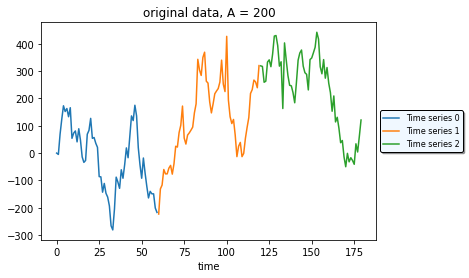

In [6]:
print('First 3 time series: \n')        
for i in range(min(3,N)):
    print(x[i,:,0],y[i][0])

Show_data(x[:,:,0],L,"original data, A = "+str(A_list[0]))
# Show_data_scatter(x[:][:][1],L,"original data")

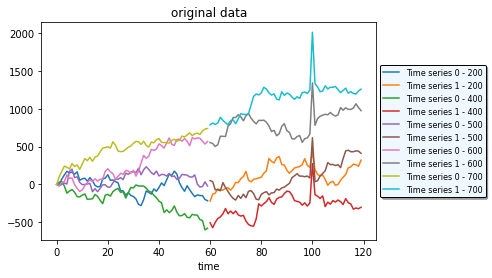

In [7]:
for i, A in zip(range(num_As), A_list):
    Show_data(x[:,:,i],L,"original data", nseries=2, show=False, A=A)

plt.show()


## Save data on file

In [8]:
# command in linux
# !mkdir DATA
for i, A in zip(range(num_As), A_list):
    str0 = f'ts_L{L}_Z{Z}_A{A}_DX{DX}_bias{bias}_N{N}.dat'
    print(str0)
    
    fname='DATA/x_'+str0
    np.savetxt(fname,x[:, :, i],fmt="%d")
    fname='DATA/y_'+str0
    np.savetxt(fname,y[:, i],fmt="%d")

ts_L60_Z12_A200_DX50_bias5_N10000.dat
ts_L60_Z12_A400_DX50_bias5_N10000.dat
ts_L60_Z12_A500_DX50_bias5_N10000.dat
ts_L60_Z12_A600_DX50_bias5_N10000.dat
ts_L60_Z12_A700_DX50_bias5_N10000.dat


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3c8e8699-579b-4f24-9413-a98afebf04a2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>